![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/classification_covidnet.ipynb)

# Classification on CovidNet 

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [TCIA-MIDRC-RIC-1C](https://app.gesund.ai/data/dataset-details/Dataset3/overview)

To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Classification Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/classification/gesund_custom_format/gesund_custom_format_annotations_classification.json

# Classification Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/classification/gesund_custom_format/gesund_custom_format_predictions_classification.json

# Classification Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/classification/test_class_mappings.json

--2024-11-06 10:58:23--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/classification/gesund_custom_format/gesund_custom_format_annotations_classification.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5890 (5.8K) [text/plain]
Saving to: ‘gesund_custom_format_annotations_classification.json’

gesund_custom_forma 100%[===================>]   5.75K  --.-KB/s    in 0s      

2024-11-06 10:58:23 (32.9 MB/s) - ‘gesund_custom_format_annotations_classification.json’ saved [5890/5890]

--2024-11-06 10:58:24--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/classification/gesund_custom_format/gesund_custom_format_predictions_classification.json
Resolving raw.githubusercontent.com (raw.githubuserconten

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `classification validation` on your data. 

In [2]:
# import the required libraries
from gesund.validation import run_metrics, plotting_metrics
import pprint
import os

In [ ]:
BASE_PATH = '/content'
# provide the json files for respective values
args = {
    'annotations_json_path': os.path.join(BASE_PATH, 'gesund_custom_format_annotations_classification.json'),
    'predictions': os.path.join(BASE_PATH, 'gesund_custom_format_predictions_classification.json'),
    'class_mappings': os.path.join(BASE_PATH, 'test_class_mappings.json'),
    'problem_type': 'classification',
    'format': 'json_format',
    'write_results_to_json': True
}

### Argument breakdown


The argumment input consists of the data path and parameters.

1. Annotation data: `annotations_json_path`:  the path of the json file containing the annotation data with respect to the images.
The structure of the annotation should be as follows

```
{
   "image_id_value": {
	"image_id": image_id_value,
	"annotation": [
	  {
		"id": annotation_id_value,
		"label": truth_label_value 
			],
    	   },
	   ...
	]
   }
}
```


2. Prediction: `predictions`: the json file path containing the prediction data with respect to the images.
The structure of the prediction could be as follows, if the input data is from the 

```
{
   "image_id_value": {
           "image_id": string_image_id,
		   "prediction_class": integer_prediction_class,
		   "confidence": integer_confidence_score,
           "logits": integer_logits,
           "loss": integer_loss_value
		},
		...
}

```

3. Label dictionary: `class_mappings`: Label mapping of the class labels

```
 {"0": "normal", "1": "pneumonia"}
```

4. Problem Type: `problem_type`: Type of the problem in this context is `classification` 

5. Format: `format`: Format of the json file could be 'coco', 'yolo' or 'gesund_format'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

6. Write results: `write_results_to_json`: boolean value to write the results in json file


## <a id="results">Explore Results</a>

### Results breakdown

Metadata file not provided!


Calling all plot functions:  43%|████▎     | 10/23 [00:00<00:00, 55.01it/s]

Calling method: plot_blind_spot_metrics...
Calling method: plot_class_distributions...
Calling method: plot_class_performance_by_threshold...
Calling method: plot_class_performances...
Calling method: plot_confidence_histogram_scatter_distribution...
Calling method: plot_confusion_matrix...
Calling method: plot_explore_predictions...
Calling method: plot_gtless_confidence_histogram_scatter_distribution...
Calling method: plot_highlighted_overall_metrics...
Calling method: plot_lift_chart...
Calling method: plot_meta_distributions...
Calling method: plot_most_confused_bar...
Calling method: plot_most_confused_class_images...
Calling method: plot_parallel_categorical_analysis...
Calling method: plot_precision_recall_multiclass_statistics...
Calling method: plot_prediction_dataset_distribution...
Calling method: plot_prediction_distribution...
Calling method: plot_roc_multiclass_statistics...


Calling all plot functions: 100%|██████████| 23/23 [00:00<00:00, 88.83it/s]


Calling method: plot_softmax_probabilities_distribution...
Calling method: plot_statistics_classbased_table...
Calling method: plot_top_losses...
Calling method: plot_tp_tn_fp_fn...
Calling method: plot_training_validation_comparison_classbased_table...


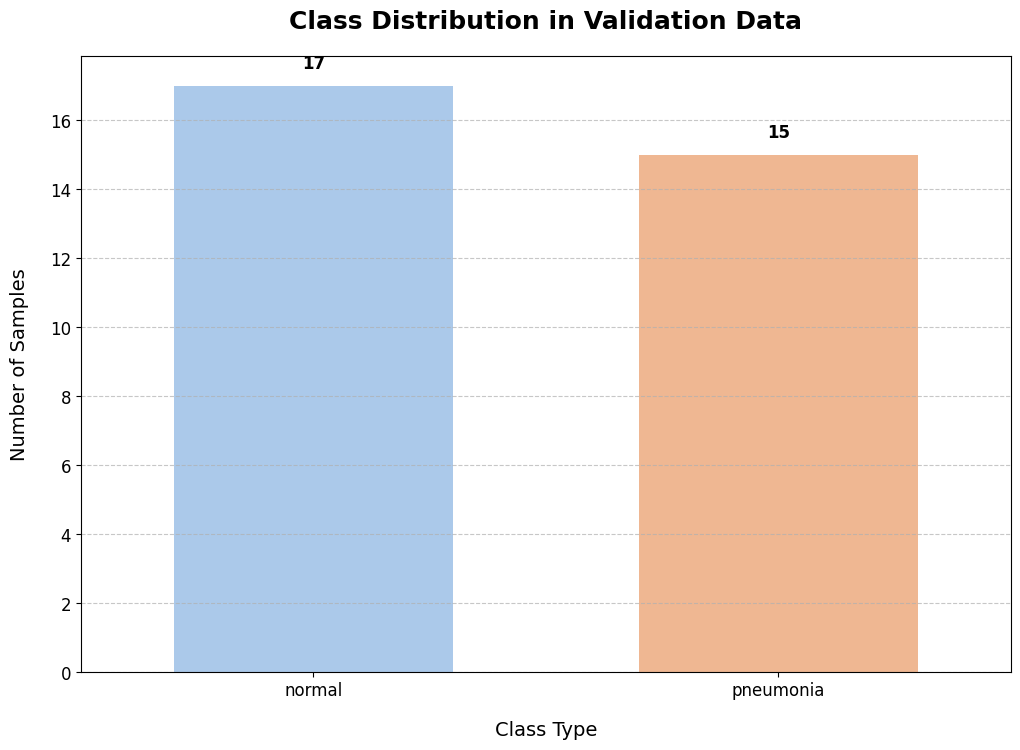

<Figure size 1400x1000 with 0 Axes>

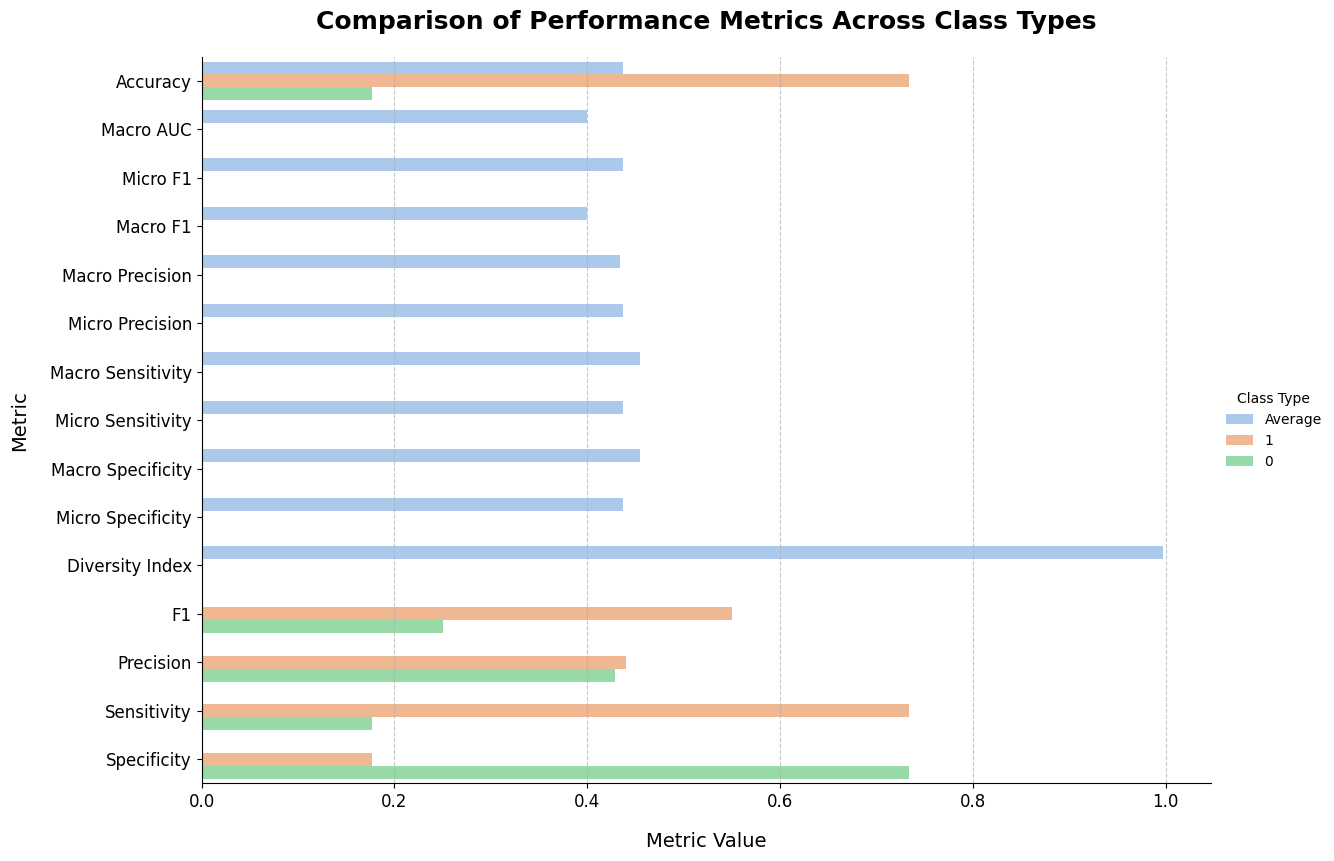

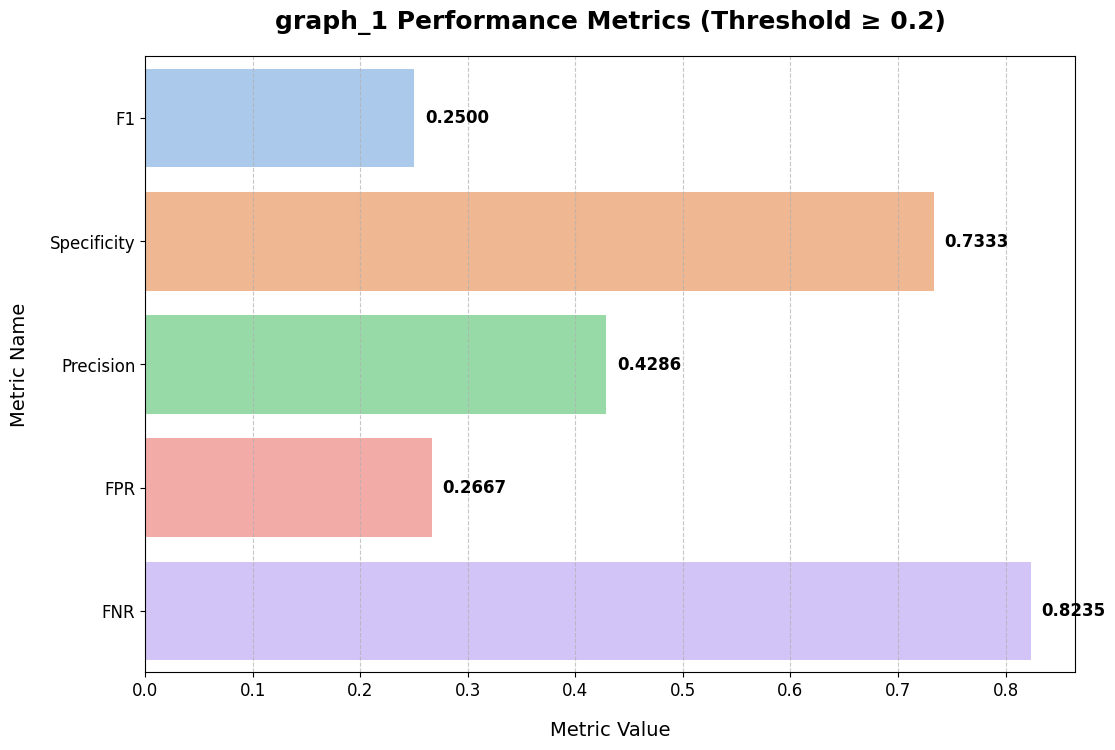

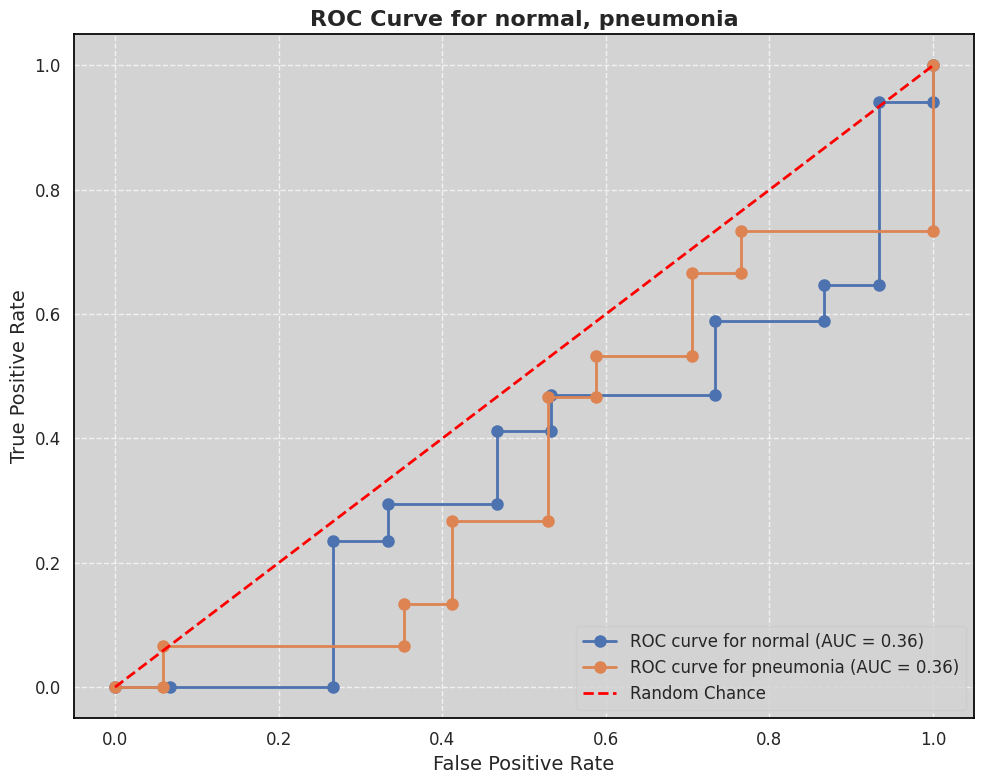

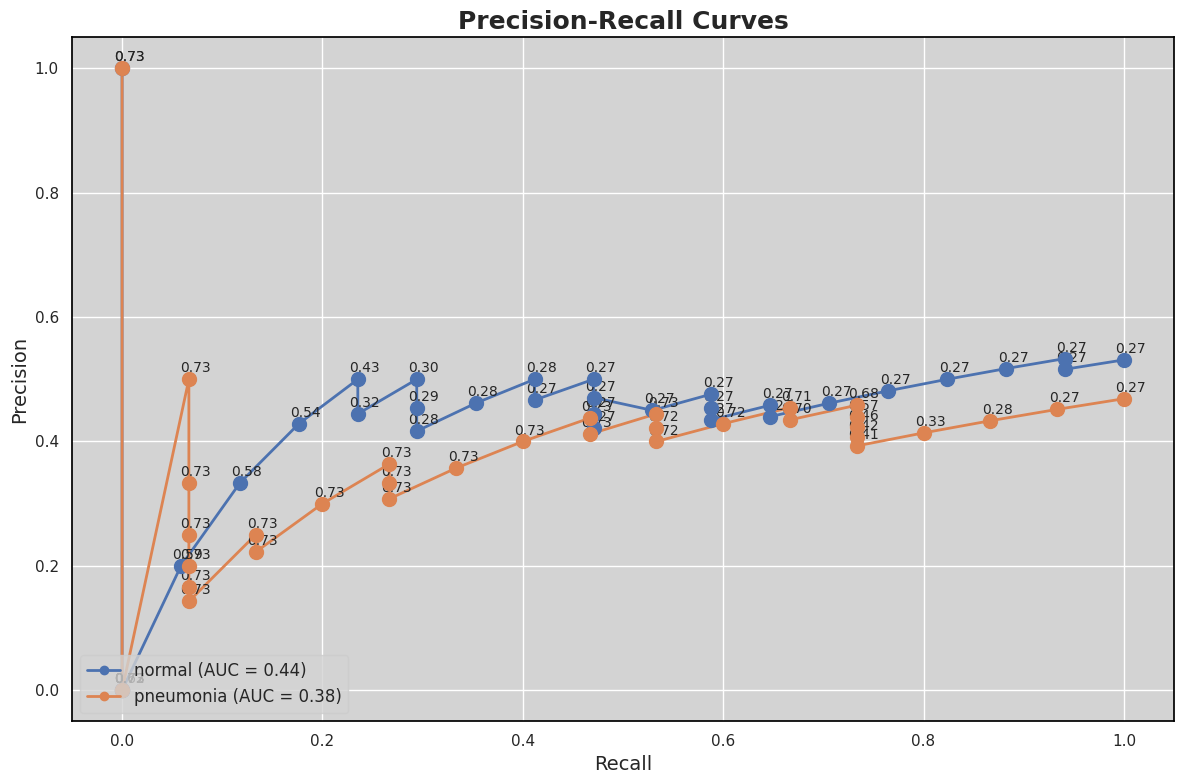

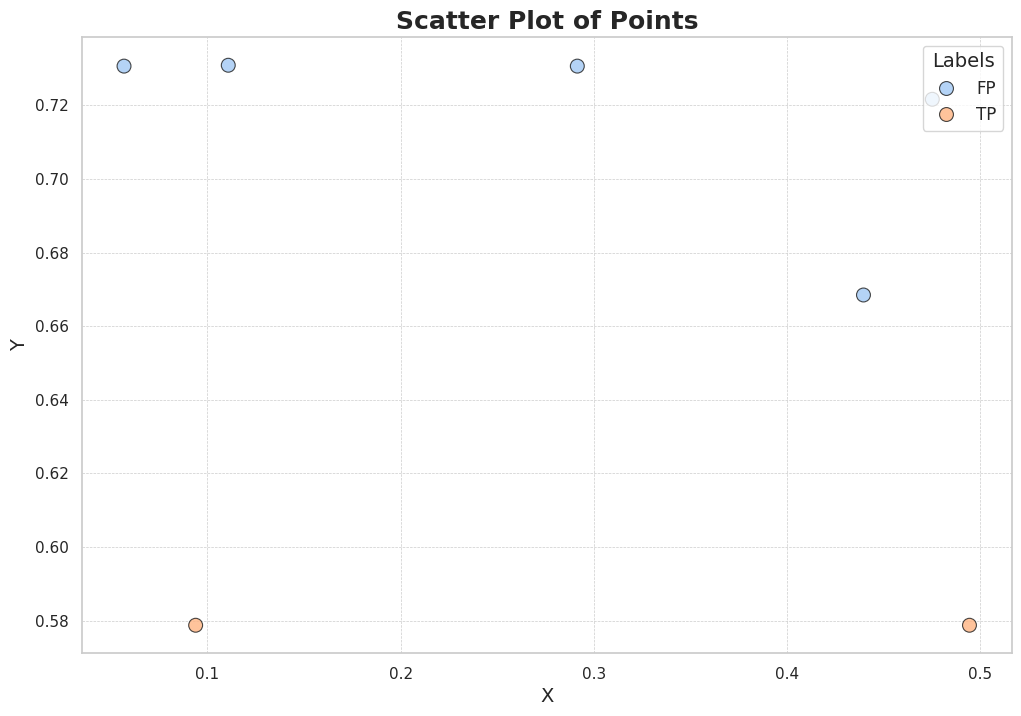

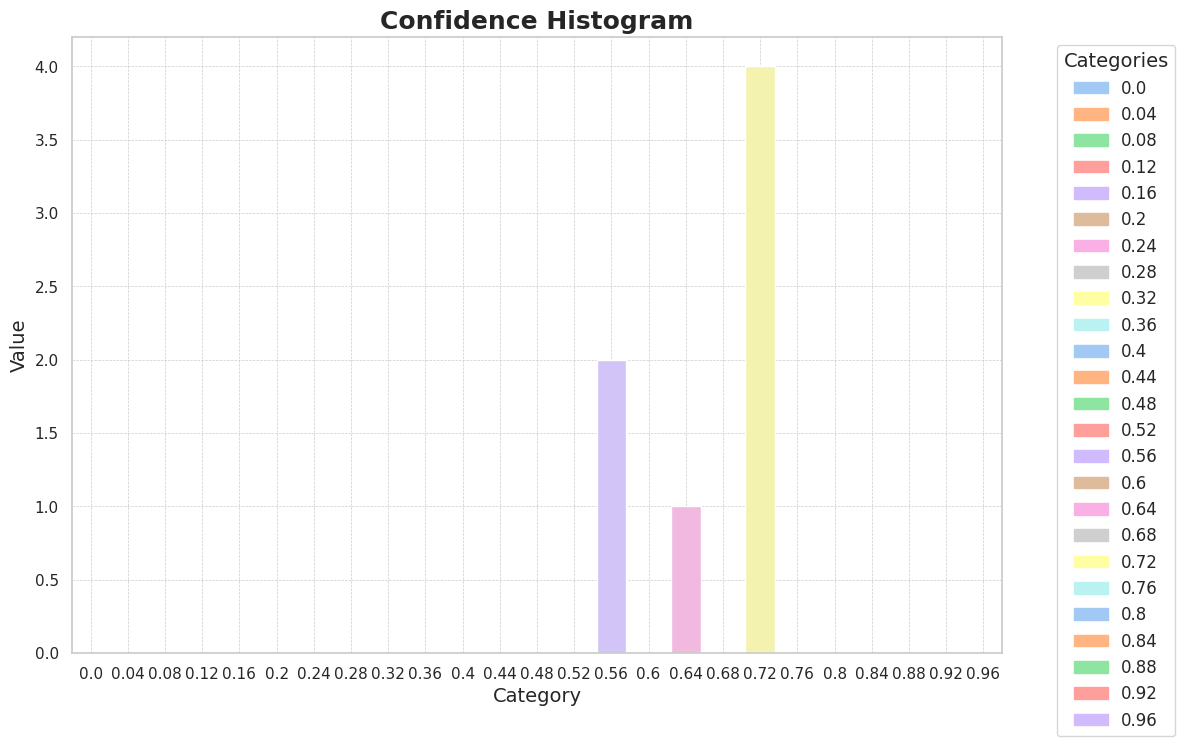

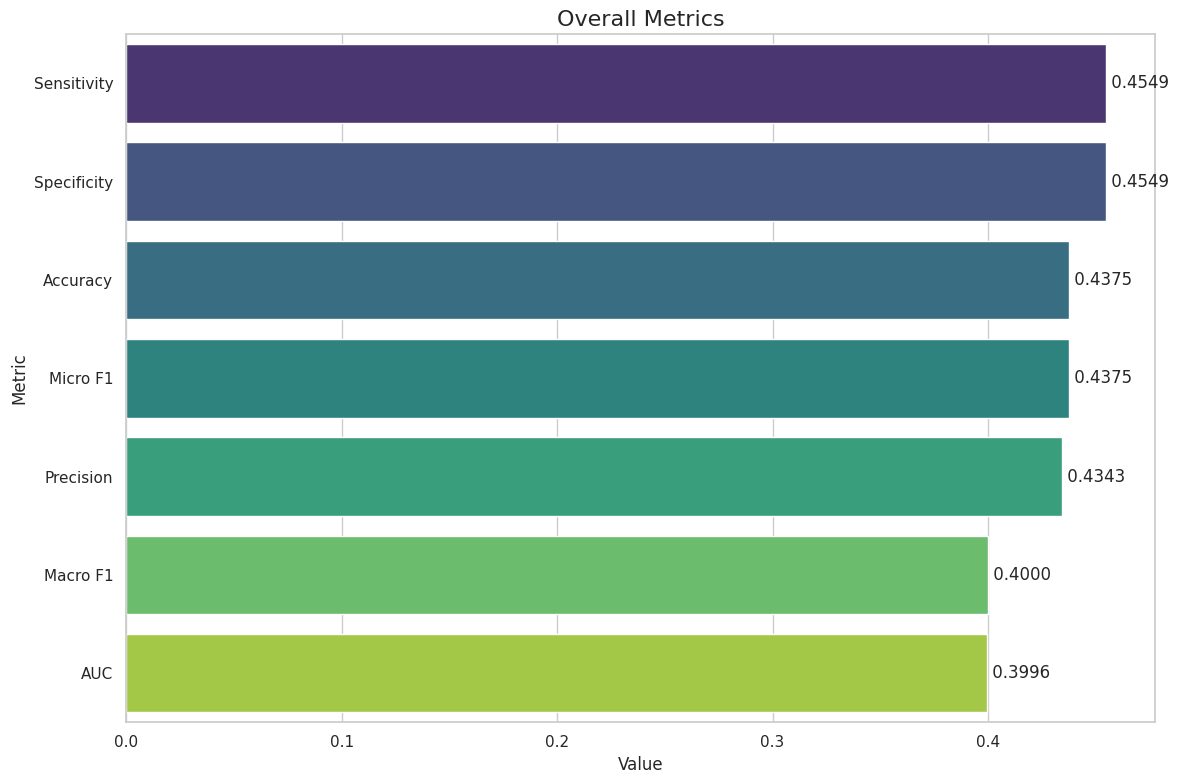

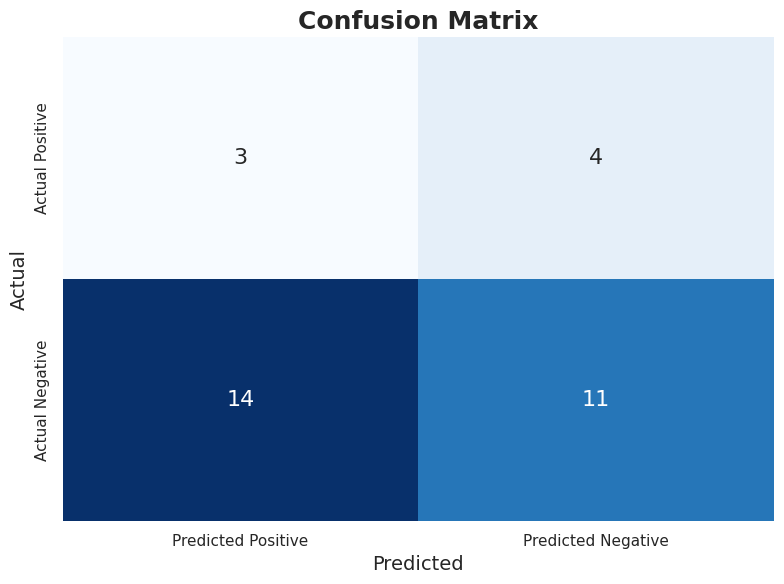

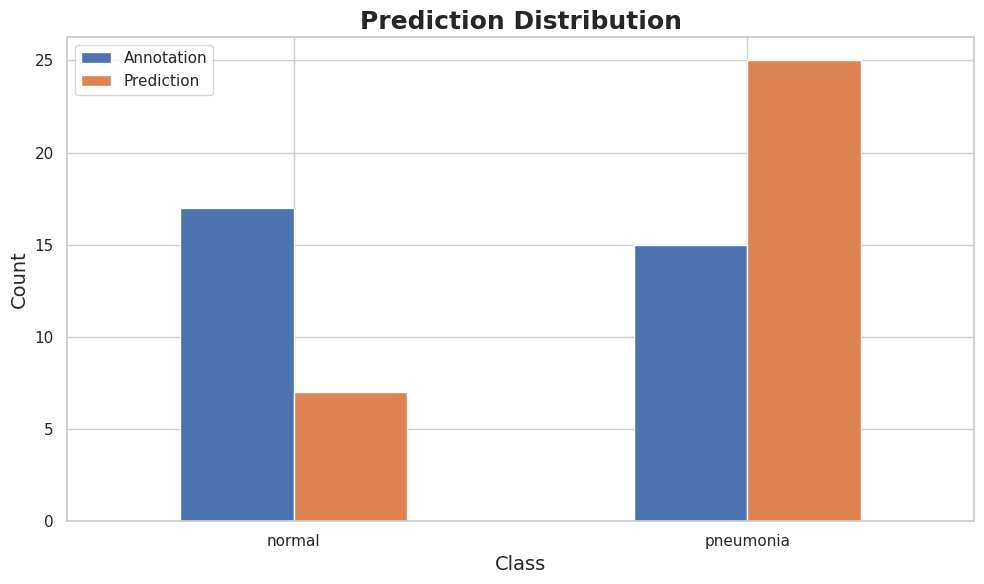

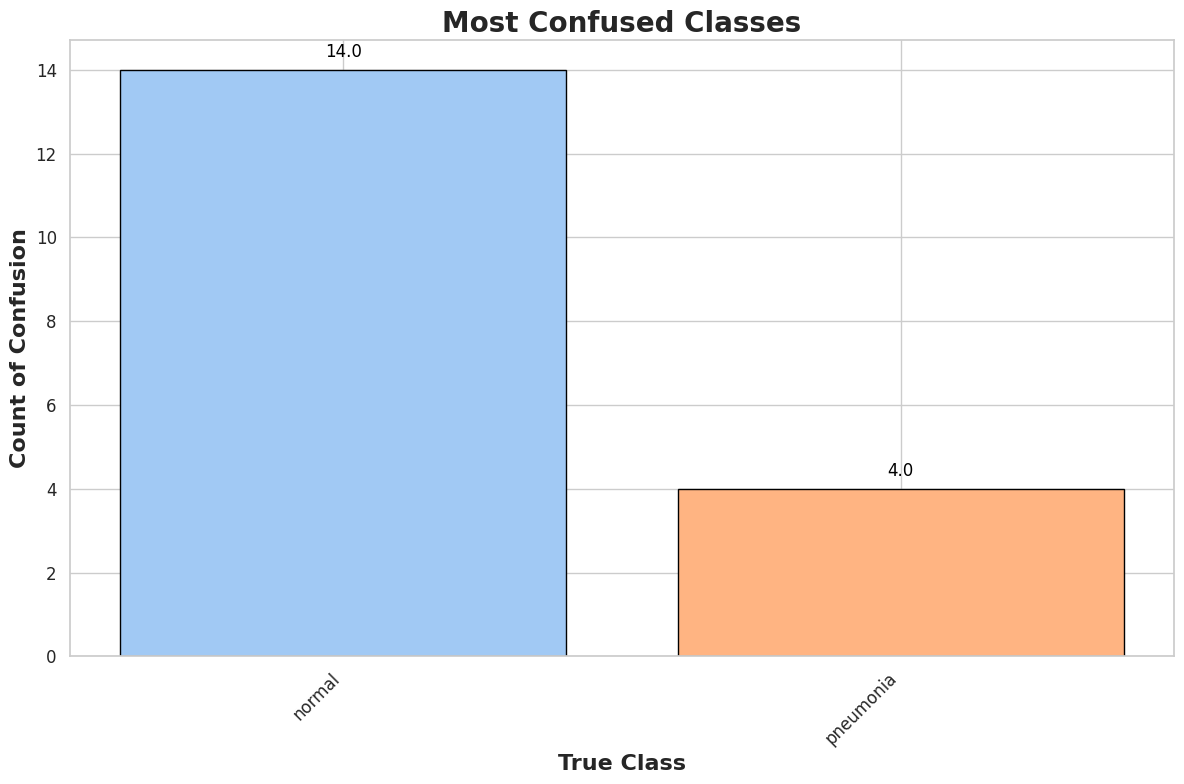

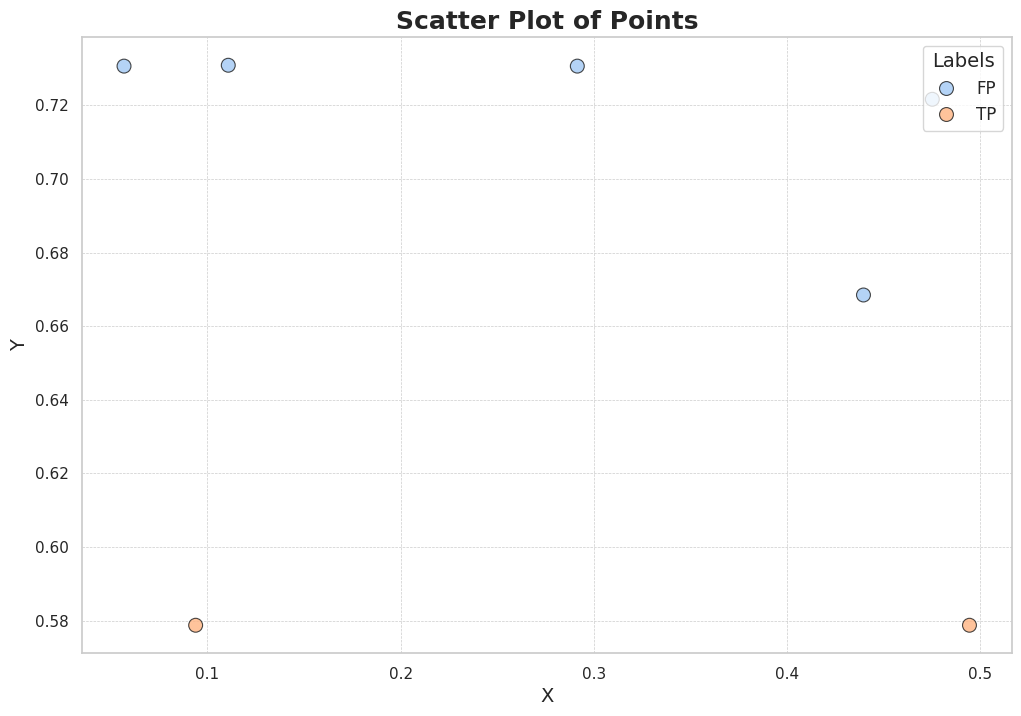

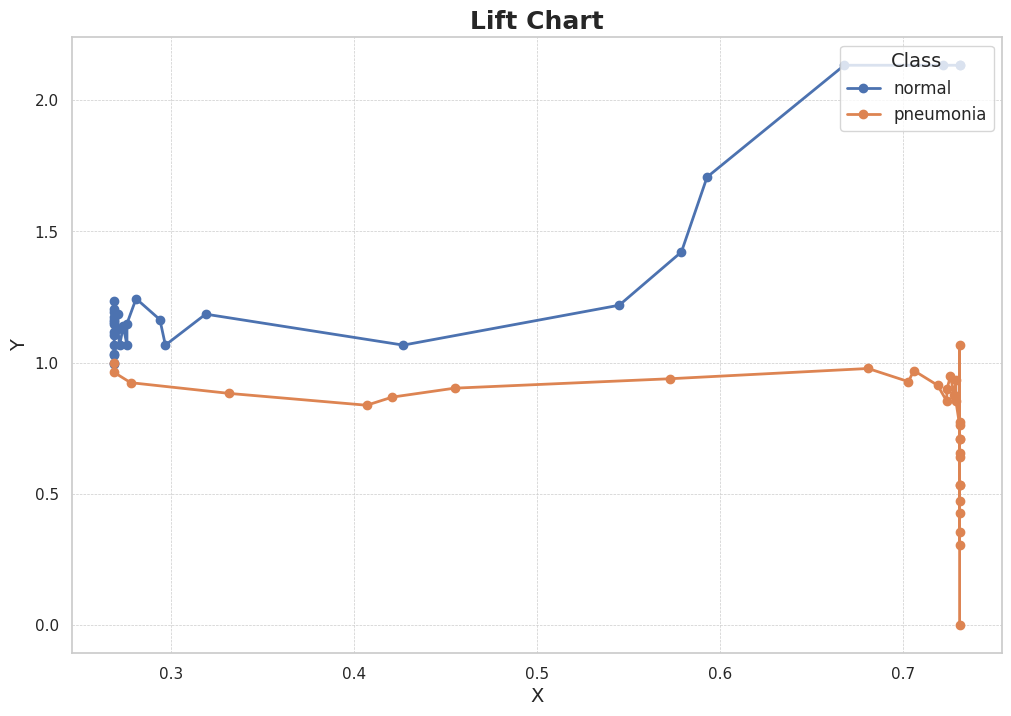

In [5]:
#execute the validation metrics
result = run_metrics(args)

args['plot_configs'] = {
         'class_distributions': {'metrics': ['normal','pneumonia'], 'threshold': 10}, 
         'blind_spot': {'class_type': ['Average','1','0']}, 
         'performance_by_threshold': {'graph_type': 'graph_1', 'metrics': ['F1', 'Sensitivity', 'Specificity', 'Precision','FPR', 'FNR'], 'threshold': 0.2}, 
         'roc': {'roc_class': ['normal', 'pneumonia']}, 
         'precision_recall': {'pr_class': ['normal','pneumonia']}, 
         'confidence_histogram': {'metrics': ['TP', 'FP'], 'threshold': 0.5}, 
         'overall_metrics': {'metrics': ['AUC','Precision'], 'threshold': 0.2},
         'confusion_matrix': {},
         'prediction_dataset_distribution': {},
         'most_confused_bar': {},
         'confidence_histogram_scatter_distribution': {},
         'lift_chart': {}
}
plotting_metrics(result, args)

When you run the above cell, logs will appear stating the progress of the validation execution. The results could be explained, the `results` returned by the `run_metrics` and the `outputs` folder produced in the process are the same only in different forms. To understand in detail about what validation metrics mean, please visit the explaination <a href="https://gesund-ai.github.io/validation_metrics.html">here</a>


Following is the directory structure of the folder.
```
-- outputs
 |- batch_job_id  
   |- plot_jsons  # json files
      |- main_metric.json
      ...
   |- plot 
      |- blind_spot.png
      ... 
```


Results: `results`: consists of following keys 

- `plot_blind_spot_metrics`: Displays key performance metrics with visual emphasis on critical values.
- `plot_class_distributions`: Shows the distribution of samples across different classes in the dataset.
- `plot_class_performance_by_threshold`:  Displays how different classification thresholds affect per-class performance metrics.
- `plot_class_performances`:  Visualizes individual performance metrics (precision, recall, F1) for each class.
- `plot_confidence_histogram_scatter_distribution`: Combines a histogram and scatter plot to show the distribution of model confidence scores.
- `plot_confusion_matrix`: Creates a heatmap showing predicted vs actual class labels to highlight where the model makes correct and incorrect predictions.
- `plot_gtless_confidence_histogram_scatter_distribution`: Shows confidence distribution for predictions without ground truth labels.
- `plot_highlighted_overall_metrics`: Displays key performance metrics with visual emphasis on critical values.
- `plot_lift_chart`: Shows the effectiveness of a classification model compared to random prediction.
- `plot_meta_distributions`: Visualizes the distribution of metadata features across different classes.
- `plot_most_confused_bar`: Bar chart showing classes that are most frequently misclassified by the model.
- `plot_most_confused_class_images`: Displays example images from the most commonly confused classes.
- `plot_parallel_categorical_analysis`: Creates a parallel coordinates plot to analyze relationships between categorical variables.
- `plot_precision_recall_multiclass_statistics`: Shows precision-recall curves for multiple classes with associated statistics.
- `plot_prediction_dataset_distribution`: Visualizes the distribution of predictions across different datasets.
- `plot_prediction_distribution`: Shows the overall distribution of model predictions.
- `plot_roc_multiclass_statistics`: Displays ROC curves and AUC scores for multiple classes.
- `plot_softmax_probabilities_distribution`:  Shows the distribution of softmax probability outputs across classes.
- `plot_statistics_classbased_table`: Creates a table visualization of per-class performance statistics.
- `plot_top_losses`: Displays examples where the model had the highest loss values.
- `plot_tp_tn_fp_fn`: Visualizes true positives, true negatives, false positives, and false negatives for each class.
- `plot_training_validation_comparison_classbased_table`: Compares class-based performance metrics between training and validation sets.

- `problem_type`: string value indicating the problem type 
- `batch_job_id`: batch job id value identifier 
- `successful_batch_data`: the input prediction data
- `annotation_data`: the input annotation data
- `meta_data`: the input metadata
- `class_mappings`: the input class mappings
- `format`: the input json format
- `output_dir`: the path where the output folder is stored

### Output JSON file breakdown

The JSON files are found under the 

```
outputs/
|- batch_job_id
   |- plot_jsons
```

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [ ]:
batch_id = result["batch_job_id"]
folder_path = os.path.join(*["outputs", batch_id, "plot_jsons"])
folder_path

As mentioned above the JSON files contains the same data as in the result variable. The files are provided for persistent storage of data.

### Output plot breakdown

The plots could be found under the following folder location

```
outputs/
|- batch_job_id
   |- plots
```

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [ ]:
batch_id = result["batch_job_id"]
image_folder = os.path.join(*["outputs", batch_id, "plots"])

def load_image(image_file):
    img_path = os.path.join(image_folder, image_file) 
    img = mpimg.imread(img_path) 
    plt.imshow(img)
    plt.axis("off")

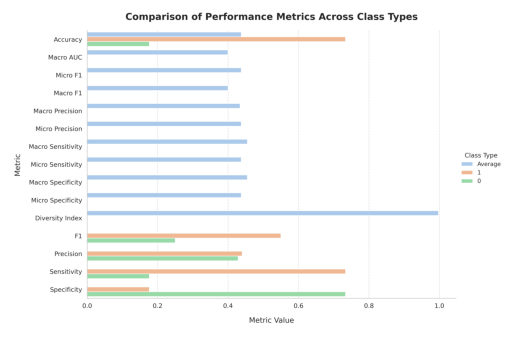

In [14]:
load_image("blind_spot.png")

`Blind Spot` This bar chart compares various performance metrics, such as accuracy, F1, sensitivity, and specificity, across different class types (0, 1, and the average). The metrics are displayed for each class and highlight differences in performance, with a notable diversity index score.

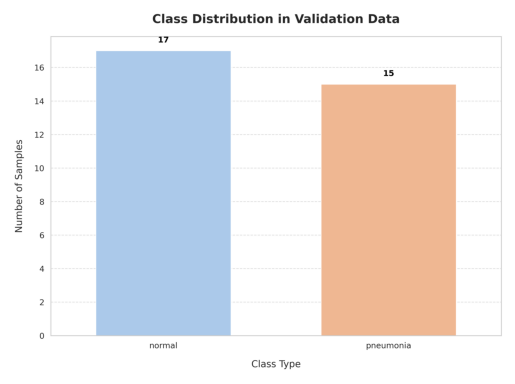

In [15]:
load_image("class_distributions.png")

`Class Distributions` This bar chart shows the class distribution in the validation dataset, with 17 samples labeled as "normal" and 15 as "pneumonia." The data is fairly balanced across the two classes.
 

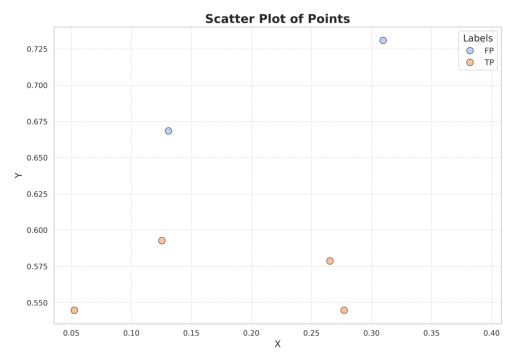

In [16]:
load_image("confidence_histogram_scatter_distribution.png")

`Confidence Histogram Scatter Distributions` This scatter plot displays points labeled as "FP" (false positives), mostly clustered around an X value near 0, with one outlier close to 1. The Y values show minimal variation.

 

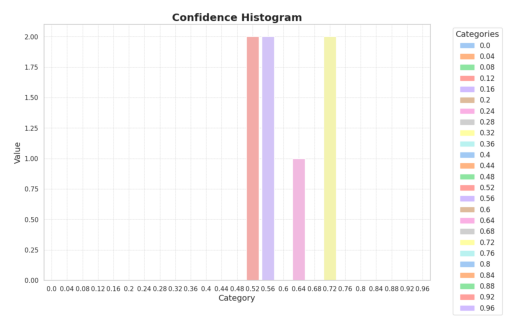

In [17]:
load_image("confidence_histogram.png")

`Confidence Histogram` The confidence histogram shows the distribution of prediction probabilities
 

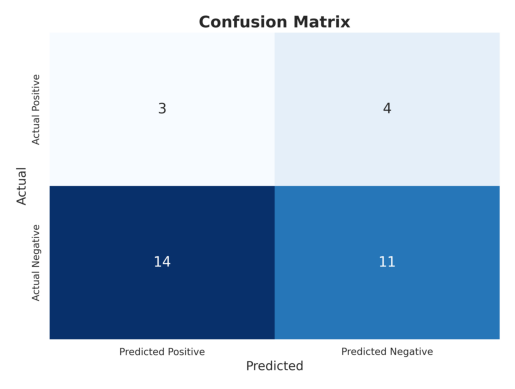

In [18]:
load_image("confusion_matrix.png")

`Confusion Matrix` Plot generates a confusion matrix for evaluating the performance of a classification algorithm.


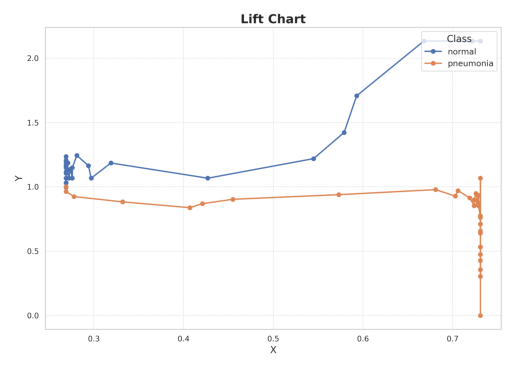

In [19]:
load_image("lift_chart.png")

`Lıft Chart` The chart displays the performance comparison between normal and pneumonia classes, where the normal class, demonstrates overall better performance with an upward trend compared to the relatively stable pneumonia class.

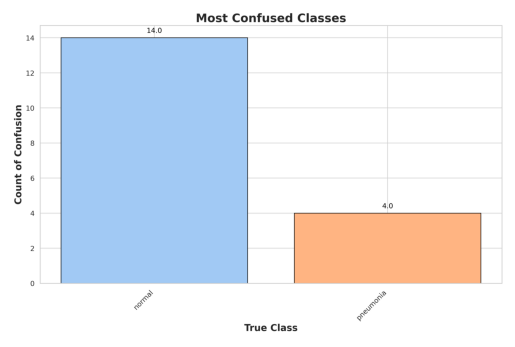

In [20]:
load_image("most_confused_bar.png")

`Most Confused Classes` The confusion chart shows that the model had more difficulty classifying normal cases compared to pneumonia cases, indicating a higher rate of misclassification for normal samples.

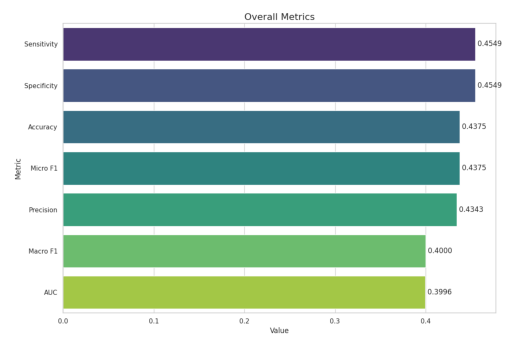

In [21]:
load_image("overall_metrics.png")

`Overall Metrics` The overall metrics chart shows different model performance measures, with most metrics achieving scores around on a scale of 0 to 1.

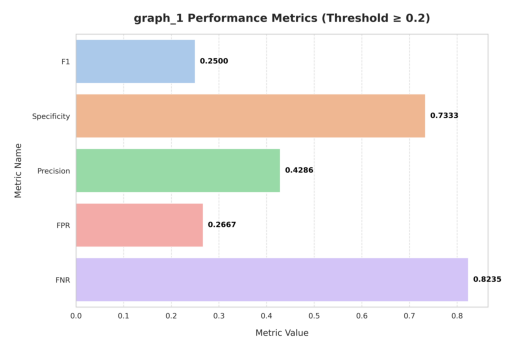

In [22]:
load_image("performance_by_threshold.png")

`Performance by Threshold` The chart presents different model performance metrics, illustrating various measurements used to evaluate the classification model's effectiveness.

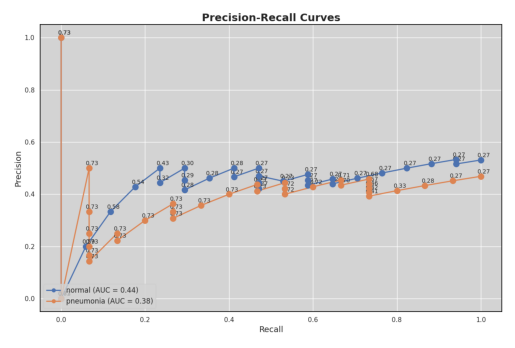

In [23]:
load_image("precision_recall.png")

`Precision-Recall Curves` The precision-recall curves visualize the trade-off between precision and recall for both normal and pneumonia classes, showing how the model balances these two important classification metrics.

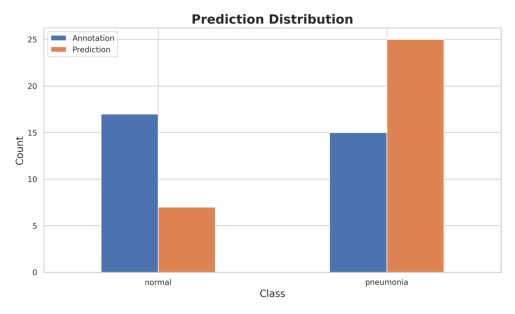

In [24]:
load_image("prediction_dataset_distribution.png")

`Prediction Distribution` The prediction distribution chart compares the actual annotations versus model predictions across different classes, showing the distribution of how the model classified the samples between normal and pneumonia categories.

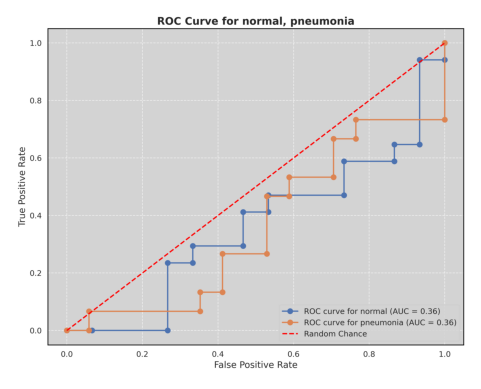

In [25]:
load_image("roc.png")

`Roc Curve` This ROC curve compares how well a diagnostic test can distinguish between normal and pneumonia cases